In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert4/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert4/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert4/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert4/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert4/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert4/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert4/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert4/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert4/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(36, 288, 36, 288, 36, 36)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(324, 324)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

324

In [10]:
df_train

,labels
0,1
1,0
2,3
3,0
4,0
...,...
319,3
320,0
321,1
322,3


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000007,0.934689,0.000111,0.046058,0.019135,2.137948e-03,1.424994e-01,4.459639e-03,8.508169e-01,8.601435e-05
1,0.997432,0.000069,0.001785,0.000628,0.000086,1.227497e-07,9.643521e-01,5.182286e-08,5.565546e-03,3.008217e-02
2,0.996366,0.000085,0.002281,0.001124,0.000144,5.780855e-08,5.143481e-01,5.623307e-04,1.106553e-02,4.740240e-01
3,0.000155,0.000412,0.010774,0.001600,0.987059,2.813428e-07,9.775755e-01,1.148386e-04,1.268976e-04,2.218257e-02
4,0.021290,0.000075,0.958374,0.001230,0.019031,1.193484e-01,3.221425e-04,8.799584e-01,3.257857e-04,4.530034e-05
5,0.027771,0.000131,0.951729,0.001666,0.018704,2.087444e-07,3.584317e-03,2.223048e-08,9.964149e-01,6.318671e-07
6,0.000365,0.000122,0.094593,0.004599,0.900321,6.727758e-06,1.045220e-01,2.136586e-04,2.062636e-01,6.889941e-01
7,0.992259,0.000225,0.003712,0.003405,0.000399,1.082696e-01,1.504496e-05,8.909058e-01,1.300963e-05,7.965486e-04
8,0.000228,0.000825,0.005277,0.987019,0.006650,9.974154e-01,4.037059e-14,2.584498e-03,1.208976e-12,5.907934e-09
9,0.000322,0.000124,0.146705,0.014205,0.838643,6.401402e-08,1.181037e-02,3.687690e-07,9.881834e-01,5.720248e-06


In [13]:
len(x_test),len(x_train)

(36, 324)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000007,0.741199,0.000243,0.195473,0.063079,2.472742e-07,0.000101,3.926887e-08,0.000009,0.999889
1,0.996983,0.000102,0.001558,0.001248,0.000108,3.894028e-04,0.042634,9.014333e-06,0.954109,0.002858
2,0.000033,0.001921,0.000663,0.995840,0.001542,1.546351e-06,0.009523,2.347871e-06,0.990398,0.000075
3,0.997012,0.000099,0.001660,0.001130,0.000099,2.401706e-08,0.000015,6.653037e-08,0.999955,0.000030
4,0.991522,0.000278,0.003104,0.004737,0.000358,6.660430e-06,0.999397,1.186462e-08,0.000420,0.000177
...,...,...,...,...,...,...,...,...,...,...
319,0.018802,0.016418,0.172556,0.049595,0.742629,9.952770e-01,0.000001,3.111160e-03,0.000002,0.001608
320,0.996510,0.000122,0.002124,0.001105,0.000139,2.273596e-06,0.985792,8.095072e-06,0.000048,0.014149
321,0.000112,0.074069,0.006376,0.120075,0.799369,1.350472e-09,0.000004,7.647923e-04,0.000450,0.998782
322,0.000127,0.000601,0.000268,0.998803,0.000202,2.468344e-08,0.971075,1.165227e-07,0.005198,0.023727


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

324

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

# training machine learning

In [18]:
from sklearn.svm import SVC
model = SVC(random_state=seed, kernel='linear')
svm=model.fit(new_x_train,new_y_train)
predictions = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [19]:
predictions

array([1, 0, 0, 4, 2, 2, 4, 0, 3, 4, 4, 0, 1, 2, 4, 0, 4, 4, 0, 4, 1, 0,
       0, 4, 1, 1, 4, 2, 0, 0, 0, 2, 1, 0, 4, 0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       0.80      1.00      0.89         4
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.96      0.90      0.91        36
weighted avg       0.98      0.97      0.97        36

----accuracy score 97.22222222222221 ----


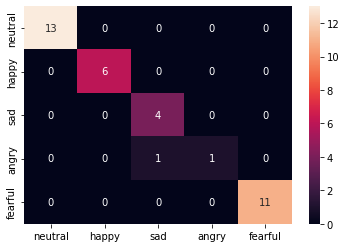

In [20]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [21]:
path='/content/drive/My Drive/fusion/savee_fusion_model/svm/linear/expert4'
savedvX = joblib.dump(svm, path)

print("MODEL SAVED")

MODEL SAVED
